predict test from already trained model

In [ ]:
! gdown https://drive.google.com/uc?id=1AbxjCBByF-xGV3c7FJ1ztZC1HO0O0uJ0

Downloading...
From: https://drive.google.com/uc?id=1AbxjCBByF-xGV3c7FJ1ztZC1HO0O0uJ0
To: /content/kaggle.json
100% 66.0/66.0 [00:00<00:00, 54.8kB/s]


In [ ]:
! pip install kaggle
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/'
! kaggle competitions download -c comp-551-fall-2021
! unzip images_l.pkl.zip
! unzip images_test.pkl.zip
! unzip images_ul.pkl.zip
! unzip labels_l.pkl.zip

 94% 187M/198M [00:04<00:00, 40.2MB/s]
100% 198M/198M [00:04<00:00, 47.5MB/s]
  0% 0.00/141k [00:00<?, ?B/s]
100% 141k/141k [00:00<00:00, 125MB/s]
 97% 191M/197M [00:01<00:00, 186MB/s]
100% 197M/197M [00:01<00:00, 181MB/s]
 87% 86.0M/99.0M [00:00<00:00, 125MB/s]
100% 99.0M/99.0M [00:00<00:00, 155MB/s]
Archive:  images_l.pkl.zip
  inflating: images_l.pkl            
Archive:  images_test.pkl.zip
  inflating: images_test.pkl         
Archive:  images_ul.pkl.zip
  inflating: images_ul.pkl           
Archive:  labels_l.pkl.zip
  inflating: labels_l.pkl            


In [ ]:
import io
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LeakyReLU, ZeroPadding2D,Convolution2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import History
from tensorflow.keras.optimizers import Nadam, Adam, SGD
from keras.applications.vgg16 import VGG16
from keras.applications.densenet import DenseNet169
from keras.applications.resnet import ResNet152, ResNet101, ResNet50
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras import backend as K
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras import layers, regularizers, Input
from keras.layers import *
from keras.callbacks import ReduceLROnPlateau
from keras import optimizers
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from google.colab import drive
import h5py
import random
import torch

In [ ]:
# Image data for training (30,000 sample, each sample is a 56x56 image)
# train_labels = pd.read_csv('train_max_y.csv')
# train_images = pd.read_pickle('train_max_x')
# test_images = pd.read_pickle('test_max_x')
with open("images_l.pkl", 'rb') as f:
    # load into as a numpy array
    train_labelled_data = pickle.load(f)
# Test images. The prediction corresponding to these images should be uploaded. (15,000 samples)
with open("images_test.pkl", 'rb') as f:
    test_data = pickle.load(f)
# Labels for training (30,000 rows, each row is a size 36 binary vector, which is the label to the corresponding image)
with open("labels_l.pkl", 'rb') as f:
    train_labelled_y = pickle.load(f)
# Additional images that can be used for training the classifier.
# Labels for these images are not provided. (30,000 samples, where each sample is a 56x56 image)
with open("images_ul.pkl", 'rb') as f:
    train_unlabelled_x = pickle.load(f)

# processing

In [ ]:
# load process data
! gdown https://drive.google.com/uc?id=1wyUpGYONbWRjdaLgeiEH2ryqm_kMOMF_
! gdown https://drive.google.com/uc?id=1tFt0ddczfNPmq8IUNnZ8ifGUbgzP9DxU

Downloading...
From: https://drive.google.com/uc?id=1wyUpGYONbWRjdaLgeiEH2ryqm_kMOMF_
To: /content/processed_train_set.csv
100% 386M/386M [00:01<00:00, 209MB/s]
Downloading...
From: https://drive.google.com/uc?id=1tFt0ddczfNPmq8IUNnZ8ifGUbgzP9DxU
To: /content/processed_test_set.csv
100% 193M/193M [00:01<00:00, 180MB/s]


In [ ]:
# load model1 and model2
! gdown https://drive.google.com/uc?id=1gpLzFm3QW1q__KMAg4QWe2pqVveAmd_y
! gdown https://drive.google.com/uc?id=1YKExD85CaznZqjKOYPc3of08iCdMrUtz

Downloading...
From: https://drive.google.com/uc?id=1gpLzFm3QW1q__KMAg4QWe2pqVveAmd_y
To: /content/VGG_valid_95.8.pkl
100% 61.4M/61.4M [00:01<00:00, 35.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1YKExD85CaznZqjKOYPc3of08iCdMrUtz
To: /content/wmy_valid_97.9_1.pkl
100% 76.0M/76.0M [00:00<00:00, 82.0MB/s]


In [ ]:
model = pickle.load(open("VGG_valid_95.8.pkl", 'rb'))
model2 = pickle.load(open("wmy_valid_97.9_1.pkl", 'rb'))

# digit

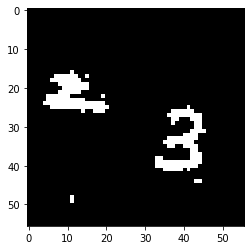

In [ ]:
# load testing data for model testing
x_test=np.array(pd.DataFrame(pd.read_csv('processed_test_set.csv')))
# x_unlabelled_train=np.array(pd.DataFrame(pd.read_csv('processed_ul_train_set.csv')))
# x_test = x_unlabelled_train

x_test=x_test.reshape((15000,56,56))

import matplotlib.pyplot as plt
import random

plt.imshow(x_test[random.randint(0,14999)], cmap="gray")
plt.show()

# with open("images_test.pkl",'rb') as f:
#   x_test = pickle.load(f)
for i in range(x_test.shape[0]):
  x_test[i] = (x_test[i]>200).astype('int32')*255
x_test = torch.Tensor(x_test)
x_test = torch.unsqueeze(x_test,dim=3)/255
x_test = x_test.repeat(1,1,1,3)
x_test = x_test.numpy()
x_test = x_test.astype('float32')

In [ ]:
result = model.predict(x_test,verbose=1)
result = np.argmax(result, axis = 1)
print(result[0:20])

469/469 [==============================] - 4s 8ms/step
[4 4 9 0 6 9 3 2 1 6 6 9 7 9 9 5 8 7 1 3]


# letter

In [ ]:
# # load testing data for model testing
# x_test_data=np.array(pd.DataFrame(pd.read_csv('processed_test_set.csv')))

# x_test_data=x_test_data.reshape((15000,56,56))


with open("images_test.pkl",'rb') as f:
  x_test_data = pickle.load(f)
x_test = x_test_data.reshape(-1,56,56,1)
# x_test /= 255

In [ ]:
result2 = model2.predict(x_test, verbose=1)
result2 = np.argmax(result2, axis = 1)
print(result2[0:20])


469/469 [==============================] - 3s 5ms/step
[19 11  9 11  9 24 14 18 22  6  5  4  6  4 16 21  9 25  8  5]


# output

In [ ]:
# transform 0-9 number to string like 0100000000, 0000001000
def transform_digit (num):
    temp_list = np.zeros(10)
    temp_list[num]=1
    temp_list = temp_list.astype(int)
    str1 = ''.join(str(i) for i in temp_list)
    return str1

# tranform 0-25 number to 26-bit string with the index at the num value to be 1
def transform_letter (num):
    temp_list = np.zeros(26)
    temp_list[num] = 1
    
    temp_list = temp_list.astype(int)
    str1 = ''.join(str(i) for i in temp_list)
    return str1

output = list()
for i in range (0,result.shape[0]):
    tempStr = transform_digit(result[i])+transform_letter(result2[i])
    output.append([i,tempStr])

In [ ]:
df=pd.DataFrame(output)
df.columns = ['# Id','Category']
df.to_csv('result.csv',index=False)